<a href="https://colab.research.google.com/github/prit-tech/Face-Detection/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u>Face Detection</u></center>

# Objective
Goal is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Deep Learning')
path = '.'

### Load the "images.npy" file
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('/content/drive/My Drive/Colab Notebooks/Deep Learning/images.npy', allow_pickle=True)

* Shape of the data :

In [0]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file

In [0]:
from matplotlib import pyplot as plt
import IPython.display as display
from PIL import Image, ImageOps

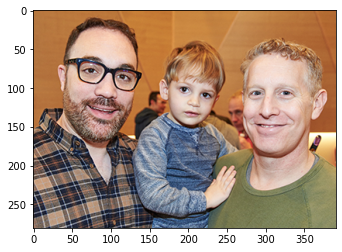

In [0]:
n = 270
image_det = data[n]
img = image_det[0]
img = Image.fromarray(img, 'RGB')
plt.imshow(img)
plt.show()

### Set image dimensions
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [0]:
X_train[n]

array([[[ 0.41176474, -0.08235294, -0.49803919],
        [ 0.41176474, -0.0745098 , -0.51372552],
        [ 0.4039216 , -0.08235294, -0.52156866],
        ...,
        [ 0.38823533, -0.19215685, -0.60784316],
        [ 0.36470592, -0.20784312, -0.62352943],
        [ 0.36470592, -0.19999999, -0.6156863 ]],

       [[ 0.42745101, -0.06666666, -0.49803919],
        [ 0.41960788, -0.06666666, -0.51372552],
        [ 0.4039216 , -0.08235294, -0.52156866],
        ...,
        [ 0.38823533, -0.18431371, -0.6156863 ],
        [ 0.38039219, -0.18431371, -0.62352943],
        [ 0.38039219, -0.19215685, -0.6156863 ]],

       [[ 0.42745101, -0.06666666, -0.50588238],
        [ 0.42745101, -0.06666666, -0.50588238],
        [ 0.43529415, -0.05882353, -0.50588238],
        ...,
        [ 0.41176474, -0.14509803, -0.59215689],
        [ 0.4039216 , -0.16862744, -0.60784316],
        [ 0.4039216 , -0.16862744, -0.60000002]],

       ...,

       [[ 0.30196083,  0.03529418, -0.12156862],
        [ 0

### Print the shape of X_train and mask array

In [0]:
# Shape of x_train
X_train.shape

(409, 224, 224, 3)

In [0]:
# Shape of masks
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.41176474 -0.08235294 -0.49803919]
  [ 0.41176474 -0.0745098  -0.51372552]
  [ 0.4039216  -0.08235294 -0.52156866]
  ...
  [ 0.38823533 -0.19215685 -0.60784316]
  [ 0.36470592 -0.20784312 -0.62352943]
  [ 0.36470592 -0.19999999 -0.6156863 ]]

 [[ 0.42745101 -0.06666666 -0.49803919]
  [ 0.41960788 -0.06666666 -0.51372552]
  [ 0.4039216  -0.08235294 -0.52156866]
  ...
  [ 0.38823533 -0.18431371 -0.6156863 ]
  [ 0.38039219 -0.18431371 -0.62352943]
  [ 0.38039219 -0.19215685 -0.6156863 ]]

 [[ 0.42745101 -0.06666666 -0.50588238]
  [ 0.42745101 -0.06666666 -0.50588238]
  [ 0.43529415 -0.05882353 -0.50588238]
  ...
  [ 0.41176474 -0.14509803 -0.59215689]
  [ 0.4039216  -0.16862744 -0.60784316]
  [ 0.4039216  -0.16862744 -0.60000002]]

 ...

 [[ 0.30196083  0.03529418 -0.12156862]
  [ 0.27058828 -0.02745098 -0.18431371]
  [-0.01176471 -0.23137254 -0.35686272]
  ...
  [ 0.06666672  0.11372554 -0.19215685]
  [ 0.05882359  0.10588241 -0.21568626]
  [ 0.082353    0.11372554 -0.20784312]]

 [

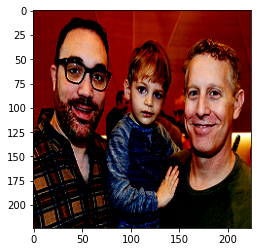

In [0]:
from matplotlib import pyplot
print(X_train[n])
plt.imshow(X_train[n])
plt.show()

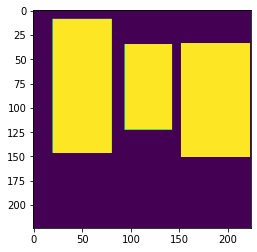

In [0]:
plt.imshow(masks[n])
plt.show()

## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

HEIGHT_CELLS = 224
WIDTH_CELLS = 224

CELL_WIDTH = IMAGE_WIDTH / WIDTH_CELLS
CELL_HEIGHT = IMAGE_HEIGHT / HEIGHT_CELLS

EPOCHS = 80
BATCH_SIZE = 1
PATIENCE = 10

THREADS = 1

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(64, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [0]:
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

### Define loss

In [0]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min", save_freq='epoch')
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
model.fit(x=X_train,y=masks, epochs=EPOCHS, batch_size=1, validation_data=None, callbacks=[checkpoint, reduce_lr, stop], shuffle=True,workers=1, use_multiprocessing=False, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/80
407/409 [============================>.] - ETA: 0s - loss: 2.1202 - dice_coefficient: 0.2449
Epoch 00001: loss improved from inf to 2.12149, saving model to model-2.12.h5
409/409 [==============================] - 28s 68ms/sample - loss: 2.1215 - dice_coefficient: 0.2443
Epoch 2/80
408/409 [============================>.] - ETA: 0s - loss: 1.7914 - dice_coefficient: 0.2933
Epoch 00002: loss improved from 2.12149 to 1.79082, saving model to model-1.79.h5
409/409 [==============================] - 15s 37ms/sample - loss: 1.7908 - dice_coefficient: 0.2932
Epoch 3/80
407/409 [============================>.] - ETA: 0s - loss: 1.6087 - dice_coefficient: 0.3289
Epoch 00003: loss improved from 1.79082 to 1.60807, saving model to model-1.61.h5
409/409 [==============================] - 15s 36ms/sample - loss: 1.6081 - dice_coefficient: 0.3287
Epoch 4/80
407/409 [========

### Get the predicted mask for a sample image

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
WEIGHTS_FILE = "model-0.43.h5"
model1 = create_model()
model1.load_weights(WEIGHTS_FILE)
preds_train = model1.predict(X_train, verbose=1)

409/409 [==============================] - 3s 8ms/sample


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


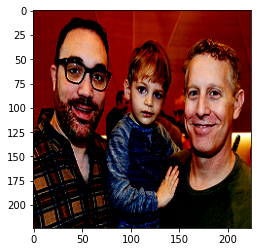

In [0]:
img_no = n
plt.imshow(X_train[img_no])
plt.savefig(str(img_no) + '-image.png')

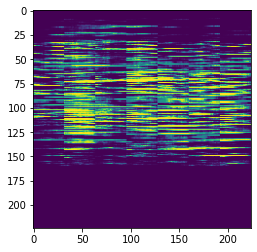

In [0]:
plt.imshow(preds_train[img_no])
plt.savefig(str(img_no) + '-mask.png')

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


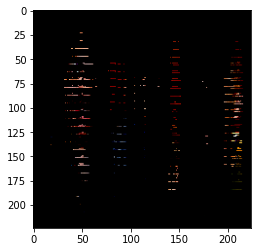

In [0]:
THRESHOLD = 0.1
sample_image = X_train[n]
image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > THRESHOLD), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2
plt.imshow(out_image)

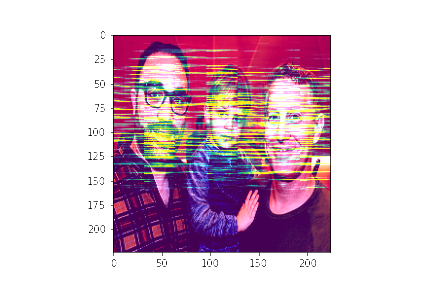

In [0]:
from google.colab.patches import cv2_imshow
import cv2
image_name = str(img_no) + '-image.png'
mask_name = str(img_no) + '-mask.png'
img = cv2.imread(image_name, 1)
mask = cv2.imread(mask_name, 1)
impose_mask = cv2.add(img,mask)
cv2_imshow(impose_mask) 